<a href="https://colab.research.google.com/github/Ayanlola2002/Analyticsvidyah/blob/LoanDefault_Hackhaton/vehicle_loan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#load important libraries
import pandas as pd 
import numpy as np                    
import seaborn as sns                  
import matplotlib.pyplot as plt      
import warnings                       

In [0]:
#unzipping the train folder
from shutil import unpack_archive
unpack_archive('train_aox2Jxw.zip')

In [0]:
# reading the data
train_Data = pd.read_csv('train.csv')
test_Data = pd.read_csv('test_bqCt9Pv.csv')

In [0]:
train_original=train_Data.copy()
test_original=test_Data.copy()

In [30]:
train_Data.columns


Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [31]:
test_Data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

In [32]:
train_Data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [33]:
train_Data.select_dtypes(include=['object']).dtypes
#train_Data.info()

Date.of.Birth                    object
Employment.Type                  object
DisbursalDate                    object
PERFORM_CNS.SCORE.DESCRIPTION    object
AVERAGE.ACCT.AGE                 object
CREDIT.HISTORY.LENGTH            object
dtype: object

In [40]:
train_Data['Date.of.Birth'].value_counts()

01-01-88    2173
01-01-90    2170
01-01-87    2127
01-01-86    2063
01-01-85    2005
01-01-91    1985
01-01-89    1962
01-01-93    1930
01-01-92    1924
01-01-95    1924
01-01-94    1867
01-01-83    1841
01-01-80    1821
01-01-84    1768
01-01-81    1764
01-01-96    1759
01-01-82    1691
01-01-78    1646
01-01-75    1641
01-01-97    1557
01-01-76    1527
01-01-77    1469
01-01-79    1438
01-01-73    1335
01-01-74    1273
01-01-70    1203
01-01-71    1142
01-01-72    1100
01-01-68     911
01-01-69     875
            ... 
27-02-56       1
23-10-60       1
30-06-65       1
19-03-61       1
20-02-00       1
06-05-63       1
28-07-69       1
08-06-55       1
24-01-79       1
22-05-57       1
12-04-00       1
25-07-60       1
25-12-57       1
29-09-58       1
22-02-98       1
12-05-55       1
14-03-59       1
15-02-57       1
21-07-58       1
29-04-64       1
08-07-59       1
16-07-57       1
30-11-60       1
02-07-57       1
20-03-58       1
26-02-67       1
21-02-56       1
08-01-57      

In [39]:
train_Data['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [41]:
train_Data['DisbursalDate'].value_counts()

31-10-18    8826
24-10-18    6701
31-08-18    6690
23-10-18    6440
26-10-18    6215
25-10-18    5944
22-10-18    5928
30-10-18    5837
30-08-18    4664
29-10-18    4389
27-10-18    4273
29-08-18    3942
20-09-18    3910
14-09-18    3806
28-09-18    3733
29-09-18    3700
21-10-18    3693
28-08-18    3665
19-09-18    3611
30-09-18    3601
20-10-18    3488
21-09-18    3381
13-10-18    3312
25-09-18    3295
17-08-18    3167
27-09-18    3152
16-08-18    3145
26-09-18    3114
22-08-18    3093
15-10-18    3024
            ... 
06-09-18    2029
28-10-18    2028
07-09-18    1987
10-10-18    1906
16-09-18    1804
08-08-18    1794
11-09-18    1790
13-08-18    1783
06-10-18    1763
04-09-18    1726
01-08-18    1708
05-09-18    1699
10-08-18    1692
03-08-18    1666
09-08-18    1653
08-09-18    1576
10-09-18    1539
27-08-18    1517
04-10-18    1490
04-08-18    1411
03-09-18    1406
22-09-18    1401
14-10-18    1351
18-10-18    1203
05-10-18    1149
26-08-18     705
12-08-18     572
13-09-18     3

In [42]:
train_Data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts() 

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [46]:
train_Data['AVERAGE.ACCT.AGE'].value_counts() 

0yrs 0mon      119373
0yrs 6mon        6028
0yrs 7mon        5366
0yrs 11mon       5237
0yrs 10mon       5143
1yrs 0mon        5031
0yrs 9mon        5018
0yrs 8mon        4892
1yrs 1mon        4465
0yrs 5mon        4354
0yrs 4mon        4269
1yrs 2mon        3941
1yrs 3mon        3694
0yrs 3mon        3570
1yrs 4mon        3146
1yrs 5mon        2980
0yrs 2mon        2933
1yrs 6mon        2782
1yrs 7mon        2477
1yrs 8mon        2216
0yrs 1mon        2207
1yrs 9mon        2037
1yrs 10mon       1978
2yrs 0mon        1963
2yrs 1mon        1945
1yrs 11mon       1903
2yrs 2mon        1478
2yrs 3mon        1270
2yrs 4mon        1241
2yrs 6mon        1165
                ...  
14yrs 7mon          2
13yrs 10mon         2
13yrs 7mon          2
13yrs 4mon          2
15yrs 0mon          2
14yrs 3mon          2
13yrs 3mon          2
12yrs 2mon          2
17yrs 10mon         2
13yrs 11mon         1
24yrs 4mon          1
15yrs 8mon          1
16yrs 0mon          1
14yrs 11mon         1
14yrs 1mon

In [47]:
train_Data['CREDIT.HISTORY.LENGTH'].value_counts() 

0yrs 0mon      119127
0yrs 6mon        4761
2yrs 1mon        4745
0yrs 7mon        4017
2yrs 0mon        3833
1yrs 0mon        3389
1yrs 1mon        3024
0yrs 11mon       2627
0yrs 8mon        2459
0yrs 9mon        2403
0yrs 10mon       2367
1yrs 11mon       2364
1yrs 3mon        2268
1yrs 2mon        2203
1yrs 6mon        2176
1yrs 7mon        2167
0yrs 4mon        2143
0yrs 5mon        2086
0yrs 3mon        1982
0yrs 2mon        1977
1yrs 4mon        1882
1yrs 5mon        1868
0yrs 1mon        1853
1yrs 10mon       1818
1yrs 9mon        1811
2yrs 2mon        1793
3yrs 0mon        1682
1yrs 8mon        1643
3yrs 1mon        1550
2yrs 6mon        1507
                ...  
29yrs 1mon          1
20yrs 4mon          1
25yrs 0mon          1
27yrs 3mon          1
19yrs 8mon          1
28yrs 3mon          1
21yrs 11mon         1
26yrs 3mon          1
30yrs 9mon          1
24yrs 2mon          1
22yrs 4mon          1
23yrs 3mon          1
34yrs 5mon          1
24yrs 8mon          1
20yrs 0mon

In [10]:
train_Data.shape,test_Data.shape


((233154, 41), (112392, 40))

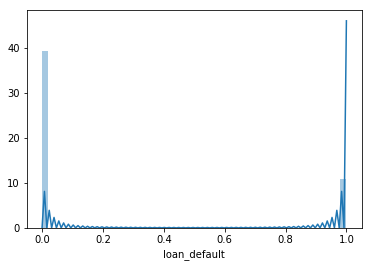

In [0]:
plt.figure()
sns.distplot(train_Data['loan_default'])

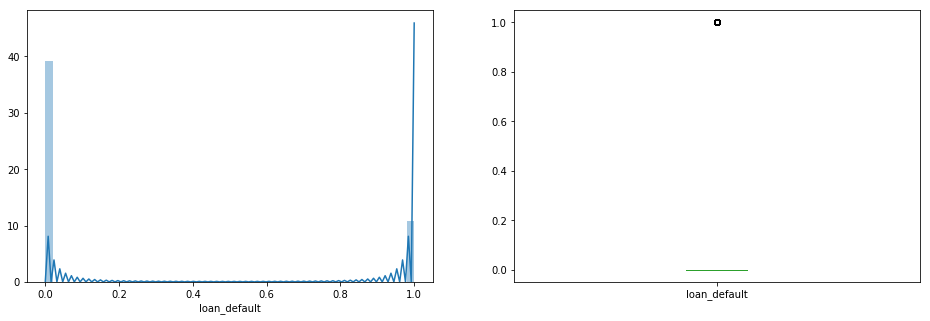

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_Data['loan_default'])
plt.subplot(122)
train_Data['loan_default'].plot.box(figsize=(16,5))
plt.show()


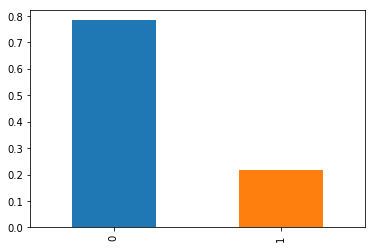

In [0]:
train_Data['loan_default'].value_counts(normalize=True).plot.bar()

In [16]:
train_Data.select_dtypes(include=['object']).dtypes

Date.of.Birth                    object
Employment.Type                  object
DisbursalDate                    object
PERFORM_CNS.SCORE.DESCRIPTION    object
AVERAGE.ACCT.AGE                 object
CREDIT.HISTORY.LENGTH            object
dtype: object

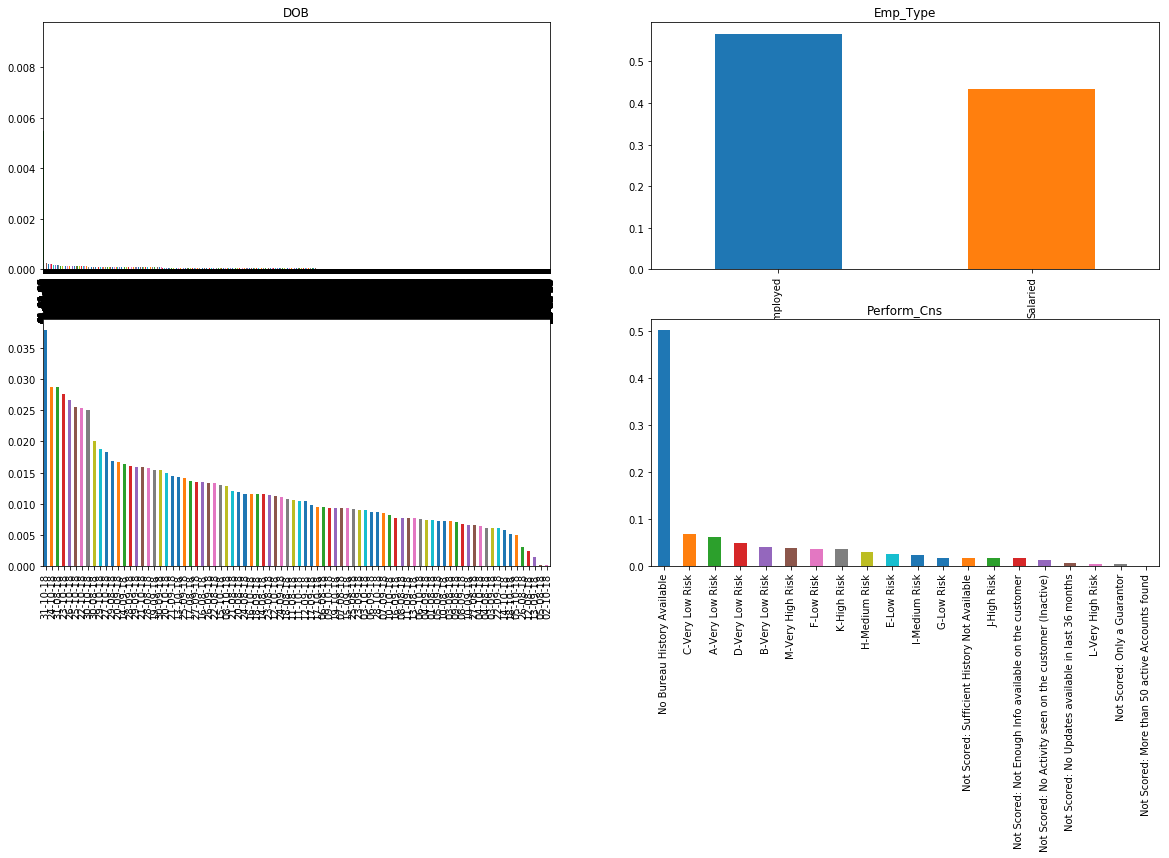

In [20]:
plt.figure(2) 
plt.subplot(221) 
train_Data['Date.of.Birth'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'DOB') 
plt.subplot(222) 
train_Data['Employment.Type'].value_counts(normalize=True).plot.bar(title= 'Emp_Type') 
plt.subplot(223) 
train_Data['DisbursalDate'].value_counts(normalize=True).plot.bar(title= 'Ds_date') 
plt.subplot(224) 
train_Data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts(normalize=True).plot.bar(title= 'Perform_Cns') 
#plt.subplot(225) 
#train_Data['AVERAGE.ACCT.AGE'].value_counts(normalize=True).plot.bar(title= 'Average Acct Age') 
#plt.subplot(226) 
#train_data['CREDIT.HISTORY.LENGTH'].value_counts(normalize=True).plot.bar(title= 'credit History ln') 
plt.show()

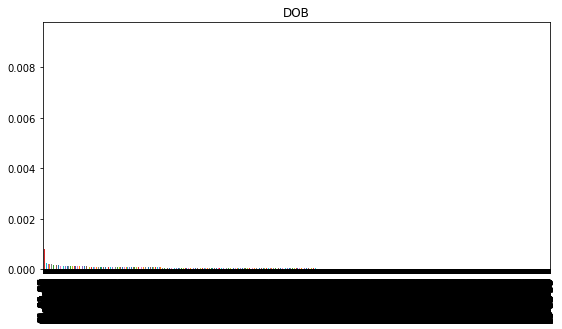

In [21]:
plt.figure(2) 
plt.subplot(221) 
train_Data['Date.of.Birth'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'DOB') 

In [0]:
# getting the shapes of the datasets
print("Shape of Train :", train_Data.shape)
print("Shape of Test :", test_Data.shape)